# Compare simulated and observed data for Col de la Porte site
 ---
**Description:** this script will compare simulated and observed data for Col de la Porte test site (France)

**Author:** Elisa Bortoli (elisa.bortoli@eurac.edu)

**Credits:** Giacomo Bertoldi (giacomo.bertoldi@eurac.edu)

**Date:** 2019-07-23

**Version:** 1.0

**Usage:** simple run

**Python version:** 3.6.8

**Requirements:** Python modules: os, glob, sys, pandas, numpy, matplotlib, netCDF4
 
 **Notes:** 
 - The test setup can be found at:
https://github.com/geotopmodel/geotop/tree/v3.0/tests/1D/ColdelaPorte


 - Infos about all the measured data can be found at:
http://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html


- The measured data used are those of CRYOBSCLIM.CDP.2018.HourlySnow.zip that can be found at:
http://doi.osug.fr/data/public/CRYOBSCLIM_CDP/

## Import the necessary modules

In [1]:
import os 
import glob 
import sys
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import netCDF4

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

In [3]:
#%matplotlib notebook

## Set the simulation path

In [4]:
data_simulated = r"/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_simulated"
sim_path = data_simulated + r"/sim_8"
sim_path

'/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_simulated/sim_8'

## Load observed data

In [5]:
obs_path = sim_path + "/obs/"

## Select the time interval for the analysis

In [6]:
# Select time period
ref_start = '2001-09-21 00:00'
ref_end   = '2002-04-10 00:00'

In [7]:
time_h = pd.date_range(ref_start, ref_end, freq='H')

print("len(time_h) = ", len(time_h))

len(time_h) =  4825


### 1. CDP_daily_eval

In [8]:
daily_eval = pd.read_csv(obs_path+'CDP_daily_eval.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(daily_eval) = ", list(daily_eval))
print("len(daily_eval) = ", len(daily_eval))
print("start = ", daily_eval.index.min())
print("end   = ", daily_eval.index.max())
daily_eval.head()

list(daily_eval) =  ['Snow thick [m] (Ultra-sound or laser depth ra...)', 'Snow thick [m] (pit)', 'Snow thick [m] (pit south)', 'Snow thick [m] (pit north)', 'SWE [kg/m**2] (Cosmic Ray Counter, NRC)', 'SWE [kg/m**2] (pit)', 'SWE [kg/m**2] (pit south)', 'SWE [kg/m**2] (pit north)', 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)', 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)', 'Albedo [%]']
len(daily_eval) =  5159
start =  1993-09-21 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m] (Ultra-sound or laser depth ra...),Snow thick [m] (pit),Snow thick [m] (pit south),Snow thick [m] (pit north),"SWE [kg/m**2] (Cosmic Ray Counter, NRC)",SWE [kg/m**2] (pit),SWE [kg/m**2] (pit south),SWE [kg/m**2] (pit north),"Runoff [kg/m**2/day] (Lysimeter, 5 m**2)","Runoff [kg/m**2/day] (Lysimeter, 1 m**2)",Albedo [%]
Date/Time,,,,,,,,,,,
1993-09-21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. CDP_hor_disk

In [9]:
hor_disk = pd.read_csv(obs_path+'CDP_hor_disk.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(daily_eval) = ", list(hor_disk))
print("len(daily_eval) = ", len(hor_disk))
print("start = ", hor_disk.index.min())
print("end   = ", hor_disk.index.max())
hor_disk.head()

list(daily_eval) =  ['Snow thick [m]', 'SDH [m] (settling disk 1)', 'SDH [m] (settling disk 2)', 'SDH [m] (settling disk 3)', 'SDH [m] (settling disk 4)', 'SDH [m] (settling disk 5)', 'SDH [m] (settling disk 6)', 'SDH [m] (settling disk 7)', 'SDH [m] (settling disk 8)', 'SDH [m] (settling disk 9)', 'SDH [m] (settling disk 10)', 'SDH [m] (settling disk 11)', 't [°C] (attached to settling disk 1)', 't [°C] (attached to settling disk 2)', 't [°C] (attached to settling disk 3)', 't [°C] (attached to settling disk 4)', 't [°C] (attached to settling disk 5)', 't [°C] (attached to settling disk 6)', 't [°C] (attached to settling disk 7)', 't [°C] (attached to settling disk 8)', 't [°C] (attached to settling disk 9)', 't [°C] (attached to settling disk 10)', 't [°C] (attached to settling disk 11)']
len(daily_eval) =  103632
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m],SDH [m] (settling disk 1),SDH [m] (settling disk 2),SDH [m] (settling disk 3),SDH [m] (settling disk 4),SDH [m] (settling disk 5),SDH [m] (settling disk 6),SDH [m] (settling disk 7),SDH [m] (settling disk 8),SDH [m] (settling disk 9),...,t [°C] (attached to settling disk 2),t [°C] (attached to settling disk 3),t [°C] (attached to settling disk 4),t [°C] (attached to settling disk 5),t [°C] (attached to settling disk 6),t [°C] (attached to settling disk 7),t [°C] (attached to settling disk 8),t [°C] (attached to settling disk 9),t [°C] (attached to settling disk 10),t [°C] (attached to settling disk 11)
Date/Time,,,,,,,,,,,,,,,,,,,,,
1993-11-10 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Select a data subset for the chosen period (observations)
hor_disk = hor_disk[(hor_disk.index >= ref_start) & (hor_disk.index <= ref_end)]

print("len(hor_disk) = ", len(hor_disk))
print("start = ", hor_disk.index.min())
print("end   = ", hor_disk.index.max())
hor_disk.head()

len(hor_disk) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Snow thick [m],SDH [m] (settling disk 1),SDH [m] (settling disk 2),SDH [m] (settling disk 3),SDH [m] (settling disk 4),SDH [m] (settling disk 5),SDH [m] (settling disk 6),SDH [m] (settling disk 7),SDH [m] (settling disk 8),SDH [m] (settling disk 9),...,t [°C] (attached to settling disk 2),t [°C] (attached to settling disk 3),t [°C] (attached to settling disk 4),t [°C] (attached to settling disk 5),t [°C] (attached to settling disk 6),t [°C] (attached to settling disk 7),t [°C] (attached to settling disk 8),t [°C] (attached to settling disk 9),t [°C] (attached to settling disk 10),t [°C] (attached to settling disk 11)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2001-09-21 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-21 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-21 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-21 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-21 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. CDP_hor_eval

In [11]:
hor_eval = pd.read_csv(obs_path+'CDP_hor_eval.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(hor_eval) = ", list(hor_eval))
print("len(daily_eval) = ", len(hor_eval))
print("start = ", hor_eval.index.min())
print("end   = ", hor_eval.index.max())
hor_eval.head()

list(hor_eval) =  ['Snow thick [m]', 't [°C]', 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)', 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)', 'Ground heat flux [W/m**2] (replicate 1)', 'Ground heat flux [W/m**2] (replicate 2)', 'Ground heat flux [W/m**2] (replicate 3)', 'Albedo [%]']
len(daily_eval) =  119109
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m],t [°C],"Runoff [kg/m**2/day] (Lysimeter, 1 m**2)","Runoff [kg/m**2/day] (Lysimeter, 5 m**2)",Ground heat flux [W/m**2] (replicate 1),Ground heat flux [W/m**2] (replicate 2),Ground heat flux [W/m**2] (replicate 3),Albedo [%]
Date/Time,,,,,,,,
1993-11-10 00:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 01:00:00,0.0,NaN,4.8,NaN,NaN,NaN,NaN,NaN
1993-11-10 02:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 03:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 04:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Select a data subset for the chosen period (observations)
hor_eval = hor_eval[(hor_eval.index >= ref_start) & (hor_eval.index <= ref_end)]

print("len(hor_eval) = ", len(hor_eval))
print("start = ", hor_eval.index.min())
print("end   = ", hor_eval.index.max())
hor_eval.head()

len(hor_eval) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Snow thick [m],t [°C],"Runoff [kg/m**2/day] (Lysimeter, 1 m**2)","Runoff [kg/m**2/day] (Lysimeter, 5 m**2)",Ground heat flux [W/m**2] (replicate 1),Ground heat flux [W/m**2] (replicate 2),Ground heat flux [W/m**2] (replicate 3),Albedo [%]
Date/Time,,,,,,,,
2001-09-21 00:00:00,0.0,NaN,0.0,2.5,NaN,NaN,NaN,NaN
2001-09-21 01:00:00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2001-09-21 02:00:00,0.0,NaN,0.0,2.5,NaN,NaN,NaN,NaN
2001-09-21 03:00:00,0.0,NaN,0.0,2.5,NaN,NaN,NaN,NaN
2001-09-21 04:00:00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 6. CDP_soil_temp

In [13]:
soil_temp = pd.read_csv(obs_path+'CDP_soil_temp.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(soil_temp) = ", list(soil_temp))
print("len(met_insitu) = ", len(soil_temp))
print("start = ", soil_temp.index.min())
print("end   = ", soil_temp.index.max())
soil_temp.head()

list(soil_temp) =  ['Depth [m]', 't [°C]']
len(met_insitu) =  292524
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Depth [m],t [°C]
Date/Time,,
1993-11-10 00:00:00,0.1,5.06
1993-11-10 00:00:00,0.2,5.88
1993-11-10 00:00:00,0.5,6.63
1993-11-10 01:00:00,0.1,4.98
1993-11-10 01:00:00,0.2,5.83


In [14]:
# Select a data subset for the chosen period (observations)
soil_temp = soil_temp[(soil_temp.index >= ref_start) & (soil_temp.index <= ref_end)]

print("len(soil_temp) = ", len(soil_temp))
print("start = ", soil_temp.index.min())
print("end   = ", soil_temp.index.max())
soil_temp.head()

len(soil_temp) =  14475
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Depth [m],t [°C]
Date/Time,,
2001-09-21 00:00:00,0.1,8.80
2001-09-21 00:00:00,0.2,9.36
2001-09-21 00:00:00,0.5,10.00
2001-09-21 01:00:00,0.1,8.77
2001-09-21 01:00:00,0.2,9.35


## Create the dataframe

In [15]:
Tsoil10_C = soil_temp.loc[soil_temp['Depth [m]'] == 0.1].drop(columns=['Depth [m]'])
Tsoil20_C = soil_temp.loc[soil_temp['Depth [m]'] == 0.2].drop(columns=['Depth [m]'])
Tsoil50_C = soil_temp.loc[soil_temp['Depth [m]'] == 0.5].drop(columns=['Depth [m]'])

In [16]:
dataset = pd.DataFrame({'Date':hor_eval.index, 
                        'HS_mm':hor_eval['Snow thick [m]']*1000, 
                        'Tsurface_C':hor_eval['t [°C]'],
                        'Tsoil10_C':Tsoil10_C['t [°C]'], 
                        'Tsoil20_C':Tsoil20_C['t [°C]'], 
                        'Tsoil50_C':Tsoil10_C['t [°C]']},
                        columns =['Date','HS_mm','Tsurface_C','Tsoil10_C','Tsoil20_C','Tsoil50_C'])
dataset = dataset.set_index('Date')
    
print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.head()

#obs_dataset = dataset.to_csv("obs_dataset.txt", sep=',',index=True)

len(dataset) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,HS_mm,Tsurface_C,Tsoil10_C,Tsoil20_C,Tsoil50_C
Date,,,,,
2001-09-21 00:00:00,0.0,NaN,8.80,9.36,8.80
2001-09-21 01:00:00,0.0,NaN,8.77,9.35,8.77
2001-09-21 02:00:00,0.0,NaN,8.75,9.35,8.75
2001-09-21 03:00:00,0.0,NaN,8.71,9.34,8.71
2001-09-21 04:00:00,0.0,NaN,8.62,9.33,8.62


### Simulated data 
### (a) surface.txt 

In [17]:
# Read in list of files
surface_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(surface_path)
unsorted_surface_files = glob.glob("surface*.txt")

# Sort in alphabetical order files
surface_files = sorted(unsorted_surface_files, key=str.lower)

# Imports files into pandas dataframe
surface_data = []
for j,trace in enumerate(surface_files):
    filepath = os.path.join(surface_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    # Resample at daily time scale
#    traces_series = traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    traces_series = traces_series[(traces_series.index >= ref_start) & (traces_series.index <= ref_end)]
    
    # Append
    surface_data.append(traces_series)
    
# View all the columns headers
print(list(traces_series), "\n")

# Print useful infos
print("len(traces_series) = ", len(traces_series))
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
traces_series.head()

['JulianDayFromYear0[days]', 'TimeFromStart[days]', 'Simulation_Period', 'Run', 'IDpoint', 'Psnow_over_canopy[mm]', 'Prain_over_canopy[mm]', 'Psnow_under_canopy[mm]', 'Prain_under_canopy[mm]', 'Prain_rain_on_snow[mm]', 'Wind_speed[m/s]', 'Wind_direction[deg]', 'Relative_Humidity[-]', 'Pressure[mbar]', 'Tair[C]', 'Tdew[C]', 'Tsurface[C]', 'Tvegetation[C]', 'Tcanopyair[C]', 'Surface_Energy_balance[W/m2]', 'Soil_heat_flux[W/m2]', 'SWin[W/m2]', 'SWbeam[W/m2]', 'SWdiff[W/m2]', 'LWin[W/m2]', 'LWin_min[W/m2]', 'LWin_max[W/m2]', 'SWnet[W/m2]', 'LWnet[W/m2]', 'H[W/m2]', 'LE[W/m2]', 'Canopy_fraction[-]', 'LSAI[m2/m2]', 'z0veg[m]', 'd0veg[m]', 'Estored_canopy[W/m2]', 'SWv[W/m2]', 'LWv[W/m2]', 'Hv[W/m2]', 'LEv[W/m2]', 'Hg_unveg[W/m2]', 'LEg_unveg[W/m2]', 'Hg_veg[W/m2]', 'LEg_veg[W/m2]', 'Evap_surface[mm]', 'Trasp_canopy[mm]', 'Water_on_canopy[mm]', 'Snow_on_canopy[mm]', 'Qvegetation[-]', 'Qsurface[-]', 'Qair[-]', 'Qcanopyair[-]', 'LObukhov[m]', 'LObukhovcanopy[m]', 'Wind_speed_top_canopy[m/s]', 'D

,JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,Psnow_over_canopy[mm],Prain_over_canopy[mm],Psnow_under_canopy[mm],Prain_under_canopy[mm],Prain_rain_on_snow[mm],...,glac_depth[mm],glac_water_equivalent[mm],glac_density[kg/m3],glac_temperature[C],glac_melted[mm],glac_subl[mm],lowest_thawed_soil_depth[mm],highest_thawed_soil_depth[mm],lowest_water_table_depth[mm],highest_water_table_depth[mm]
Date12[DDMMYYYYhhmm],,,,,,,,,,,,,,,,,,,,,
2001-09-21 01:00:00,731115.041667,0.041667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 02:00:00,731115.083333,0.083333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 03:00:00,731115.125000,0.125000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 04:00:00,731115.166667,0.166667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 05:00:00,731115.208333,0.208333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.014341,500.031956,500.031956


### (b) ground.txt

In [18]:
# Read in list of files
ground_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(ground_path)
unsorted_ground_files = glob.glob("ground*.txt")

# Sort in alphabetical order files
ground_files = sorted(unsorted_ground_files, key=str.lower)

# Imports files into pandas dataframe
ground_data = []
for j,trace in enumerate(ground_files):
    filepath = os.path.join(ground_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    
     # Resample at daily time scale
#    traces_series = traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    traces_series = traces_series[(traces_series.index >= ref_start) & (traces_series.index <= ref_end)]
    
    # Append
    ground_data.append(traces_series)
    
# Print useful infos
print("len(traces_series) = ", len(traces_series))
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
traces_series.head()

len(traces_series) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,100.000000,200.000000,500.000000
Date12[DDMMYYYYhhmm],,,,,,,,
2001-09-21 00:00:00,731115.000000,0.000000,0,1,1,1.000000,1.000000,1.000000
2001-09-21 01:00:00,731115.041667,0.041667,1,1,1,1.030212,1.002405,1.000022
2001-09-21 02:00:00,731115.083333,0.083333,1,1,1,1.110656,1.015680,1.000242
2001-09-21 03:00:00,731115.125000,0.125000,1,1,1,1.117433,1.032254,1.000828
2001-09-21 04:00:00,731115.166667,0.166667,1,1,1,0.993776,1.030107,1.001516


## Plot Simulated vs Observed data

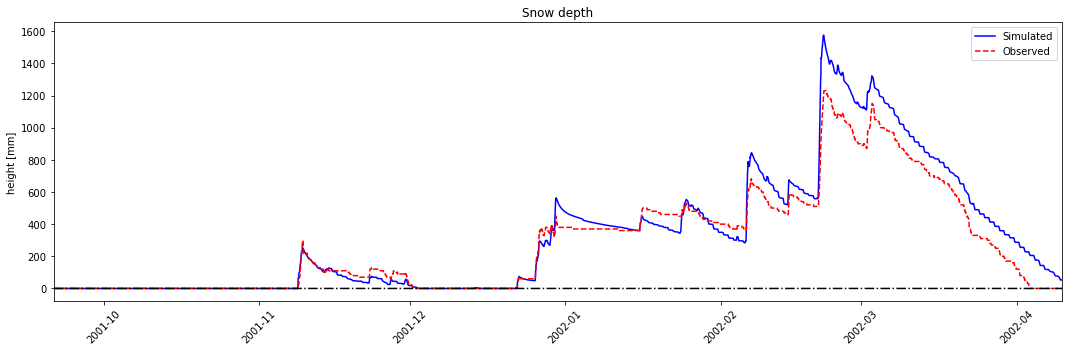

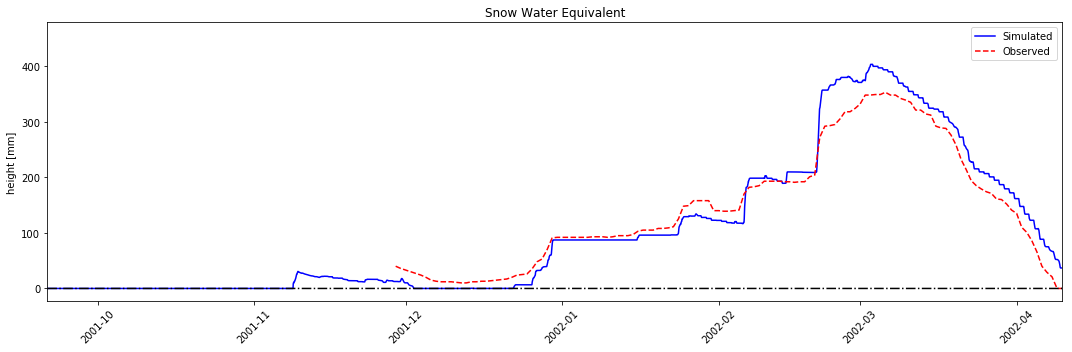

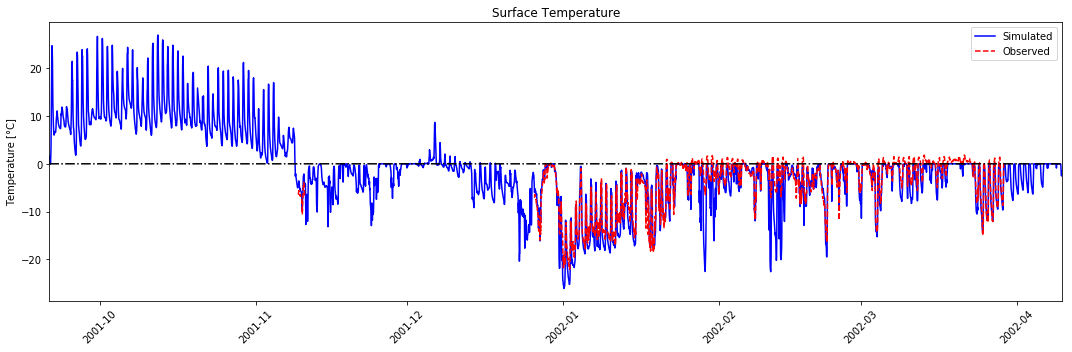

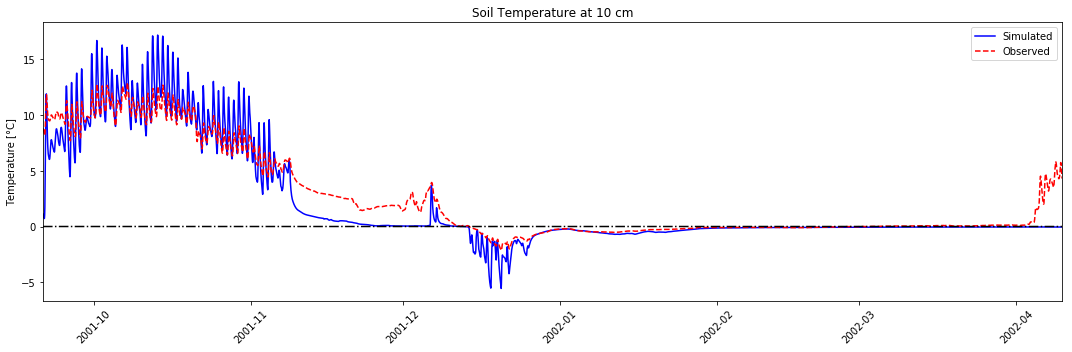

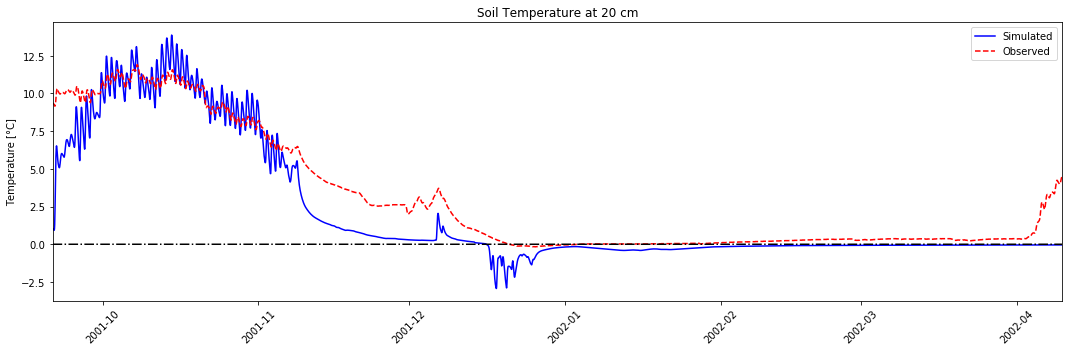

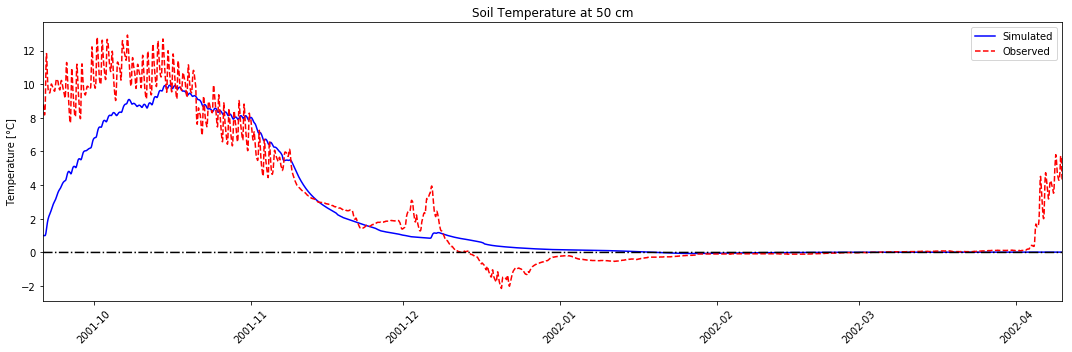

In [19]:
for i in range(0,len(surface_files)):
    surfacedata = surface_data[i]
    grounddata = ground_data[i]
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(surfacedata.index, surfacedata['snow_depth[mm]'], color='blue')
    plt.plot(dataset.index, dataset['HS_mm'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("height [mm]")
    plt.title("Snow depth")
    plt.tight_layout()
    plt.savefig("Hsnow.png")
    plt.show();
# ------------------------------------------------------------------------------------------------------- 
    plt.figure(figsize = (15,5))
    plt.plot(surfacedata.index, surfacedata['snow_water_equivalent[mm]'], color='blue')
    plt.plot(daily_eval.index, daily_eval['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("height [mm]")
    plt.title("Snow Water Equivalent")
    plt.tight_layout()
    plt.savefig("SWE.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(surfacedata.index, surfacedata['Tsurface[C]'], color='blue')
    plt.plot(dataset.index, dataset['Tsurface_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Surface Temperature")
    plt.tight_layout()
    plt.savefig("Tsurface.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------  
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['100.000000'], color='blue')
    plt.plot(dataset.index, dataset['Tsoil10_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 10 cm")
    plt.tight_layout()
    plt.savefig("Tsoil10cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['200.000000'], color='blue')
    plt.plot(dataset.index, dataset['Tsoil20_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 20 cm")
    plt.tight_layout()
    plt.savefig("Tsoil20cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['500.000000 '], color='blue')
    plt.plot(dataset.index, dataset['Tsoil50_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 50 cm")
    plt.tight_layout()
    plt.savefig("Tsoil50cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
#plt.close('all')

## Load meteo data

In [20]:
# Read in list of files
meteo_path = sim_path + r"/meteo/"

# Select only point0*.txt files
os.chdir(meteo_path)
unsorted_meteo_files = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files = sorted(unsorted_meteo_files, key=str.lower)


# Select only point0*.txt files
os.chdir(meteo_path)
unsorted_meteo_files = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files = sorted(unsorted_meteo_files, key=str.lower)

# Imports files into pandas dataframe
meteo_appended_data = []
for j,trace in enumerate(meteo_files):
    filepath = os.path.join(meteo_path, trace)
    meteo_traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date'], # Date format is correct
                                index_col = ['Date'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999999']) # NaN 
    
    # Resample at daily time scale
#    meteo_traces_series = meteo_traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    meteo_traces_series = meteo_traces_series[(meteo_traces_series.index >= ref_start) & (meteo_traces_series.index <= ref_end)]
    
    # Append
    meteo_appended_data.append(meteo_traces_series)
    
# Print useful infos
print("len(traces_series) = ", len(meteo_traces_series))
print("start = ", meteo_traces_series.index.min())
print("end   = ", meteo_traces_series.index.max())
meteo_traces_series.head()

len(traces_series) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Prec,Ws,RH,Tair,SW,LW
Date,,,,,,
2001-09-21 00:00:00,0.00000,0.6,87.709978,8.48,0.0,328.333
2001-09-21 01:00:00,0.98532,1.2,97.838958,7.11,0.0,351.389
2001-09-21 02:00:00,0.00000,0.4,97.805567,7.06,0.0,341.944
2001-09-21 03:00:00,0.00000,0.4,94.735807,6.69,0.0,326.111
2001-09-21 04:00:00,0.00000,0.3,92.693283,6.14,0.0,288.056


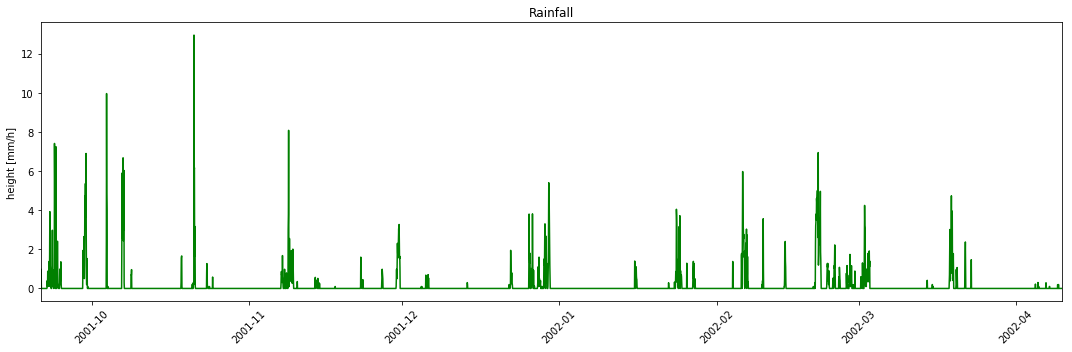

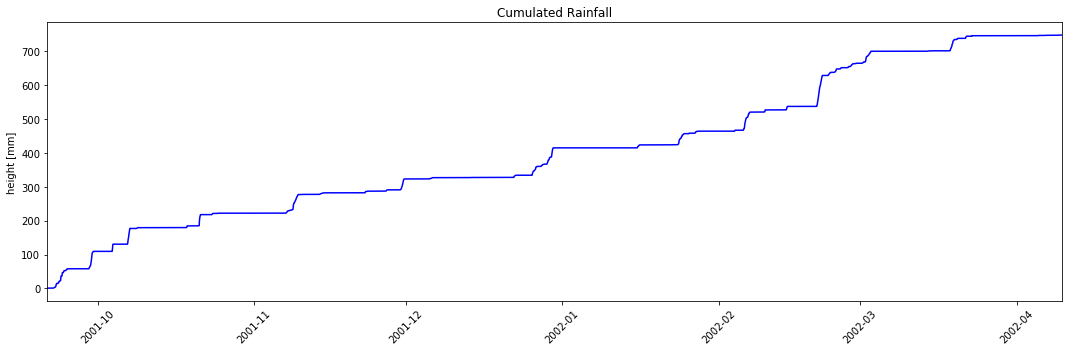

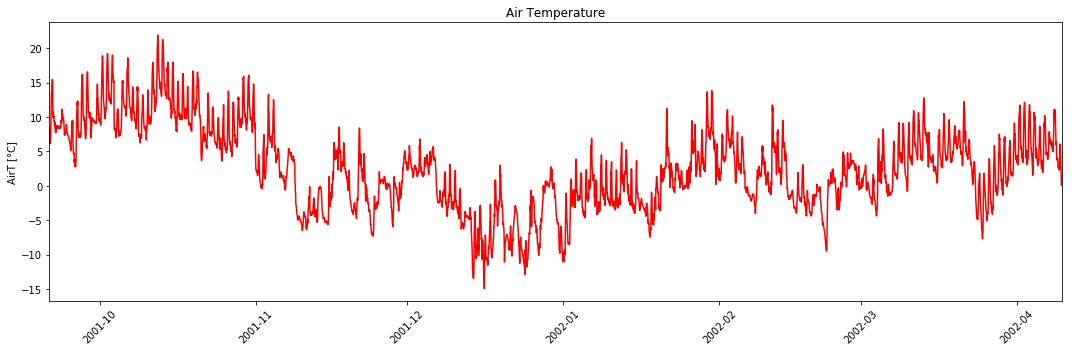

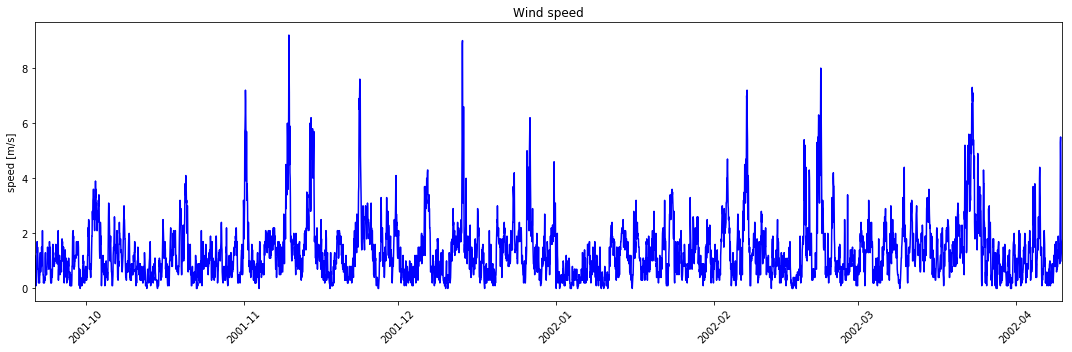

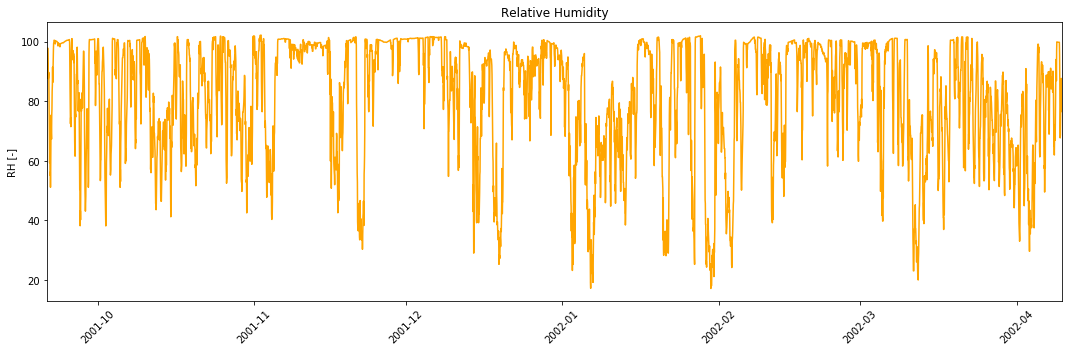

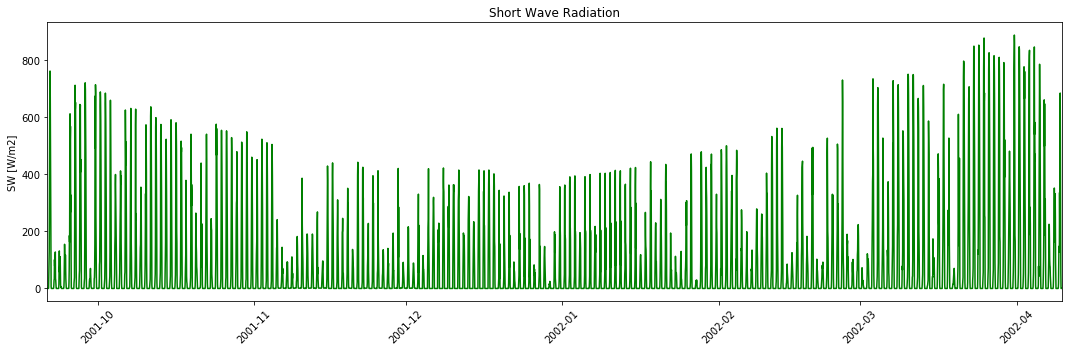

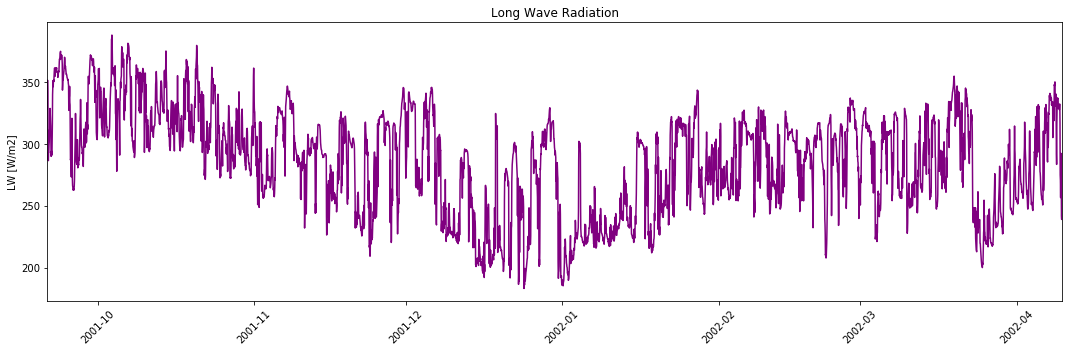

In [21]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteo_mydata = meteo_appended_data[i]
    
    if 'Prec' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Prec'], color = 'green')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Rainfall")
        plt.ylabel("height [mm/h]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Prec' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Prec'].cumsum(), color = 'blue')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Cumulated Rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Tair' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Tair'], color = 'red')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Ws' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Ws'], color = 'blue')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Wind speed")
        plt.ylabel("speed [m/s]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'RH' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['RH'], color = 'orange')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'SW' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['SW'], color = 'green')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Short Wave Radiation")
        plt.ylabel("SW [W/m2]")
        plt.tight_layout()
        plt.show();
        # -----------------------------------------------------------------------------------------------
    if 'LW' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['LW'], color = 'purple')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Long Wave Radiation")
        plt.ylabel("LW [W/m2]")
        plt.tight_layout()
        plt.show();
#plt.close('all')